# Визуализация

На этом семинаре мы поймём, как строить графики, показывающие разные характеристики текстов.

Посмотрим сначала на готовый инструмент для визуализации — [RAWGraph](https://www.rawgraphs.io/). Загрузим туда данные из уже имеющейся [таблички](https://docs.google.com/spreadsheets/d/1XqqOIKMDgjsiV81etygs1EyDIg98RhXPPKYQi0D3QIg/edit?usp=sharing) про длину текста разных авторов.

На самом деле это довольно просто!

[Ссылка](https://colab.research.google.com/drive/1WjJNpwXEaDuuGf39ErkODRhc-pMpSuNF?usp=sharing) на тетрадку в Google Colab

Импортируем нужные для работы модули

In [26]:
#Работа с таблицами — понадобится, чтобы хранить наш корпус
import pandas as pd

#Выполнение быстрых математических вычислений — пригодится, потому что иначе
#корпус с большим количеством текстов может долго обрабатываться
import numpy as np

#Модуль для работы с графиками
import matplotlib.pyplot as plt

#Ещё модуль построения графиков (строит красивые графики без лишних усилий)
import seaborn as sns
sns.set()

Выкачиваем корпус, который мы создали на предыдущих семинарах. Он будет храниться в табличке Pandas, и что особенно приятно, графики будут строиться на основании таких табличек — ни в какой другой вид их преобразовывать не надо.

In [51]:
#Считываем из файла выкачанный раньше корпус: файл с текстами и словами

corpus_link = 'https://raw.githubusercontent.com/alekseyst/text_analysis_2024/main/Practical_6/panorama_corpus.tsv'
panorama_corpus = pd.read_csv(corpus_link, sep='\t')

corpus_link_words = 'https://raw.githubusercontent.com/alekseyst/text_analysis_2024/main/Practical_6/panorama_corpus_words.tsv'
panorama_corpus_words = pd.read_csv(corpus_link_words, sep='\t')

## Столбчатые диаграммы

Простой способ показать частотность каких-то конкретных слов и сравнить их между собой.

In [52]:
panorama_corpus_words[panorama_corpus_words['lemma'].isin(['новый', 'старый'])]

,index,text_index,word,lemma,pos,feats,synt,head
1336,97,6,старый,старый,ADJ,Case=Nom|Degree=Pos|Gender=Masc|Number=Sing,amod,16
1637,22,8,старой,старый,ADJ,Case=Gen|Degree=Pos|Gender=Fem|Number=Sing,amod,4
1983,13,10,новую,новый,ADJ,Case=Acc|Degree=Pos|Gender=Fem|Number=Sing,amod,15
2956,153,14,старую,старый,ADJ,Case=Acc|Degree=Pos|Gender=Fem|Number=Sing,amod,20
2970,6,15,нового,новый,ADJ,Case=Gen|Degree=Pos|Gender=Masc|Number=Sing,amod,9
3063,99,15,новой,новый,ADJ,Case=Gen|Degree=Pos|Gender=Fem|Number=Sing,amod,34
3097,133,15,новый,новый,ADJ,Case=Nom|Degree=Pos|Gender=Masc|Number=Sing,amod,9
3188,50,16,новому,новый,ADJ,Case=Dat|Degree=Pos|Gender=Masc|Number=Sing,amod,6
3350,9,17,новой,новый,ADJ,Case=Gen|Degree=Pos|Gender=Fem|Number=Sing,amod,11
3506,13,18,новом,новый,ADJ,Case=Loc|Degree=Pos|Gender=Masc|Number=Sing,amod,16


<Axes: xlabel='lemma', ylabel='count'>

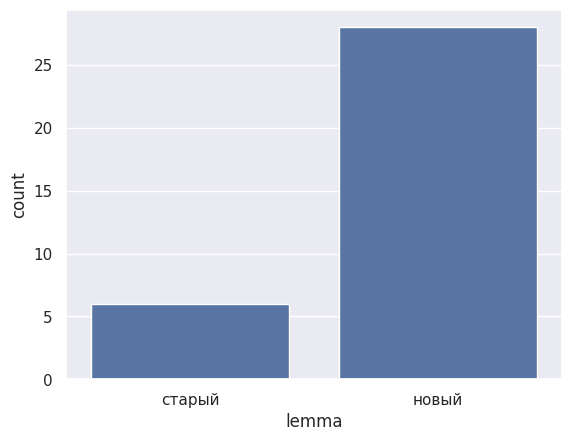

In [53]:
#Фильтруем нужные нам слова

new_old = panorama_corpus_words[panorama_corpus_words['lemma'].isin(['новый', 'старый'])]


#Рисуем диаграмму одной функцией, которая всё посчитает
sns.countplot(x=new_old['lemma'])

In [54]:
#Рисуем диаграмму по агрегированным данным
for_barplot = new_old[['lemma']].groupby('lemma', as_index=False).size()
for_barplot

,lemma,size
0,новый,28
1,старый,6


<Axes: xlabel='lemma', ylabel='size'>

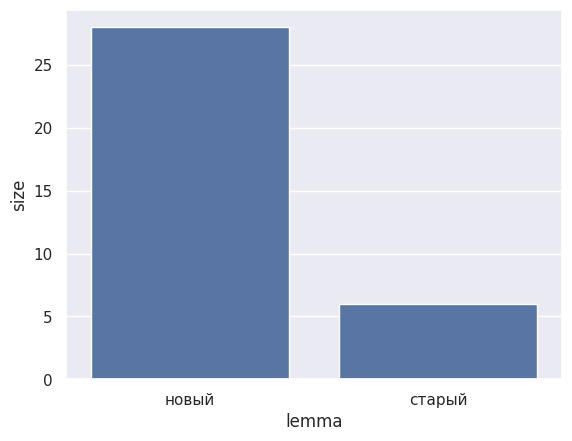

In [55]:
#Рисуем диаграмму по агрегированным данным
sns.barplot(x='lemma', y='size', data=for_barplot)

<Axes: xlabel='lemma', ylabel='size'>

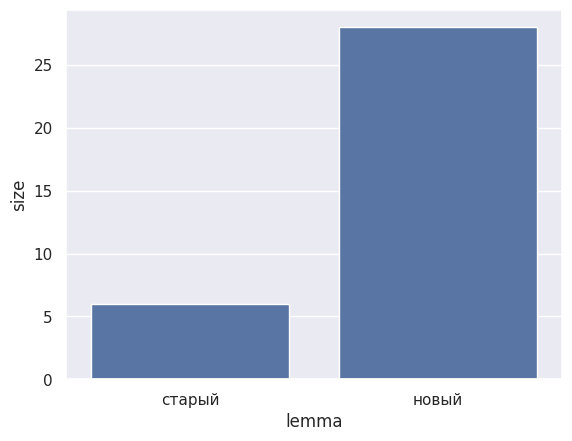

In [56]:
#Как мы видим, порядок элементов вышел разным... Мы можем его менять

order_list = ['старый', 'новый']
sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list)

[Text(0.5, 0, 'Слово'), Text(0, 0.5, 'Количество вхождений')]

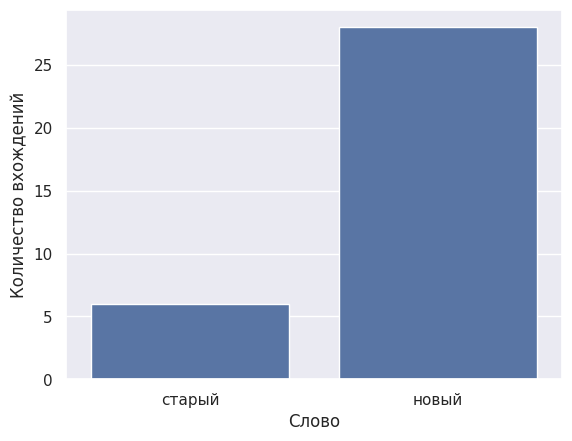

In [57]:
#Конечно, мы можем кастомизировать и много всего другого на этих и других графиках

#Например, поменять названия осей

#Для этого сначала запишем график в переменную
ax = sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list)

#Поменяем названия
ax.set(xlabel='Слово', ylabel='Количество вхождений')

<Axes: xlabel='lemma', ylabel='size'>

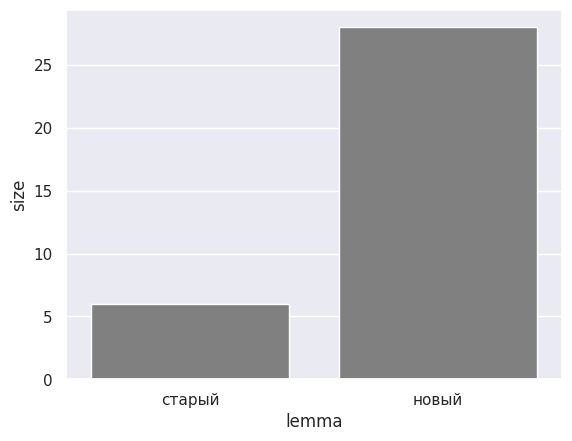

In [58]:
#Например, поменять цвета

sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list,
            color='gray')

<ipython-input-59-a68c4f9211e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list,


<Axes: xlabel='lemma', ylabel='size'>

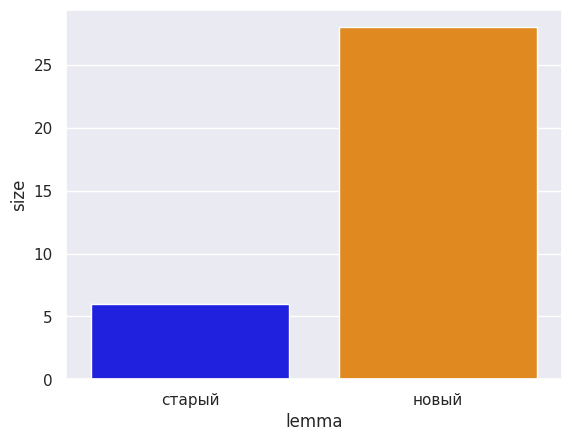

In [59]:
#Или так

sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list,
            palette=['blue', '#FF8C00'])

<Axes: xlabel='lemma', ylabel='size'>

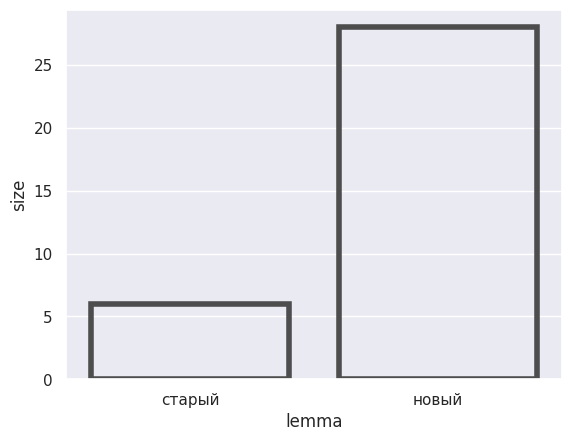

In [60]:
#Или так

sns.barplot(x='lemma', y='size', data=for_barplot, order=order_list,
            linewidth=4, edgecolor=".3", facecolor=(0, 0, 0, 0))

В целом, варьировать график можно в очень широких пределах. Естественно, не только для столбчатых диаграмм, но и для других типов графиков. Обычно, чтобы понять, как это сделать, достаточно сформулировать запрос в поисковике (лучше в Гугле и на английском).

## Задание

Постройде диаграмму, которая показывает соотношение в употребительности трёх любых слов. Дайте осям диаграммы осмысленные названия. Раскрасьте каждый из столбиков в недефолтный цвет.

In [61]:
#Впишите сюда код



In [62]:
#Теперь мы, например, можем увидеть в действии закон Ципфа, который говорит, что
#частотность слова убывает обратно пропорционально его порядковому номеру в частотном списке

#Построим частотный список и отсортируем слова по частотности
freq_list = panorama_corpus_words[panorama_corpus_words['pos'] != 'PUNCT']
freq_list = freq_list[['lemma']].groupby('lemma', as_index=False).size()
freq_list = freq_list.sort_values(by=['size'], ascending=False)

freq_list

,lemma,size
491,в,362
975,и,245
1360,на,125
2288,с,95
488,быть,95
...,...,...
1446,невероятный,1
1,-медведица,1
1444,неадекватно,1
343,Эдинбург,1


In [63]:
#Сбрасываем автоматическую нумерацию
freq_list.reset_index(drop=True).head(10)

,lemma,size
0,в,362
1,и,245
2,на,125
3,с,95
4,быть,95
5,не,74
6,что,71
7,по,62
8,они,58
9,год,57


<Axes: xlabel='lemma', ylabel='size'>

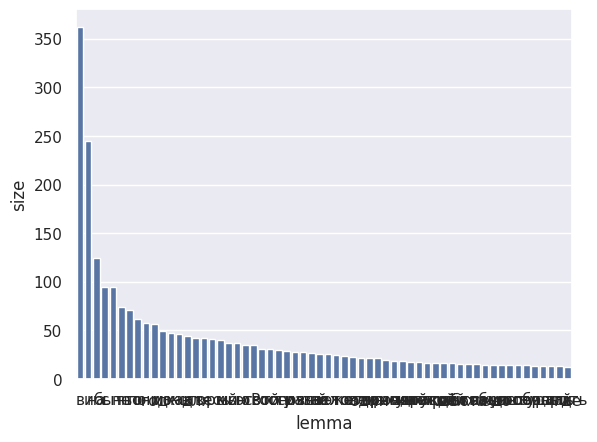

In [64]:
#Строим график

sns.barplot(x='lemma', y='size', data=freq_list[:60])

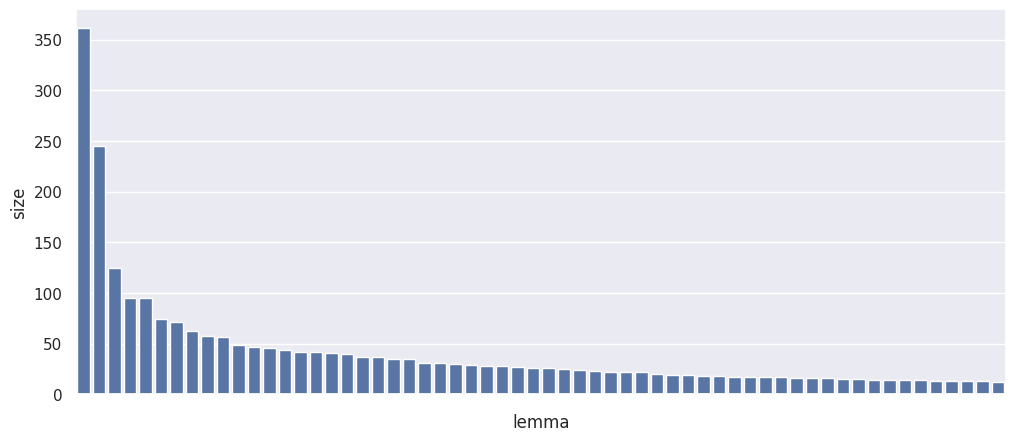

In [65]:
#Кажется, сами слова из обозначений лучше убрать, а график сделать побольше

fig, ax = plt.subplots(figsize=(12, 5))

zipfplot = sns.barplot(x='lemma', y='size', data=freq_list[:60], ax=ax)
zipfplot.set(xticklabels=[])
pass #Эта штука нужна, чтобы нам не вывели кучу мусора при переименовании

##Графики для численных данных

In [66]:
#Посмотрим на таблицу с метаинформацией. Как меняется количество статей в день?

#Сначала получим табличку с этой информацией. Мы сделаем это в pandas, но в целом
#можно, например, получить её руками в excel'е и загрузить готовой

#Разобъём дату по дефису, чтобы иметь отдельно день, месяц и год
panorama_corpus[['day', 'month', 'year']] = panorama_corpus['date'].str.split('-', 3, expand=True)

#Сделаем, чтобы день был цифрой, а не строчкой
panorama_corpus['day'] = pd.to_numeric(panorama_corpus['day'])

#Отфильтруем статьи за декабрь
dec_articles = panorama_corpus[panorama_corpus['month'] == '12']

#Сгруппируем статьи по дням и подсчитаем количество
dec_sizes =  dec_articles[['day']].groupby('day', as_index=False).size().sort_values('day')

dec_sizes.head(5)

<ipython-input-66-4b676e3c3a1c>:7: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  panorama_corpus[['day', 'month', 'year']] = panorama_corpus['date'].str.split('-', 3, expand=True)


,day,size
0,1,6
1,2,6
2,3,7
3,4,6
4,5,6


<Axes: xlabel='day', ylabel='size'>

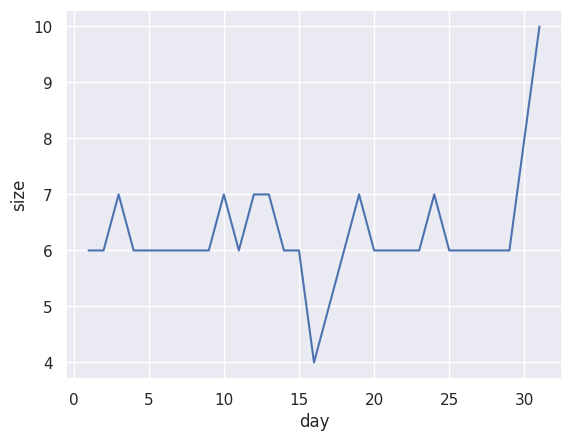

In [67]:
#Теперь мы легко можем построить линию

sns.lineplot(x='day', y='size', data=dec_sizes)

<Axes: xlabel='day', ylabel='size'>

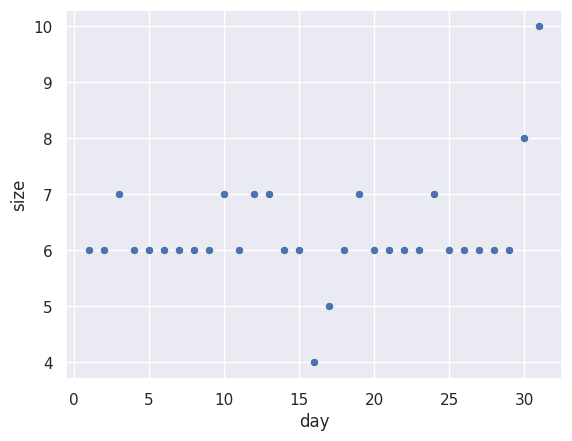

In [68]:
#Или отобразить данные точками

sns.scatterplot(x='day', y='size', data=dec_sizes)

In [69]:
#Здесь точки, конечно, не очень полезны, но если захотеть посмотреть количество
#по разным сферам новотей, то пригодятся

#Сгруппируем статьи по дням и сфере и подсчитаем количество
dec_sizes_sphere =  dec_articles[['sphere', 'day']].groupby(['sphere', 'day'], as_index=False).size()

dec_sizes_sphere.head(7)

,sphere,day,size
0,Наука,3,1
1,Наука,10,1
2,Общество,1,4
3,Общество,2,6
4,Общество,3,3
5,Общество,4,3
6,Общество,5,3


<Axes: xlabel='day', ylabel='size'>

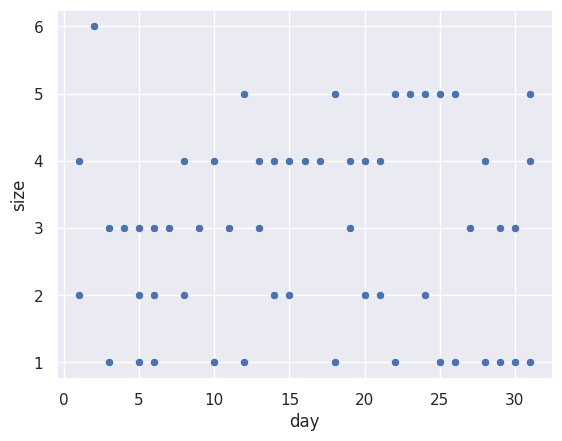

In [70]:
sns.scatterplot(x='day', y = 'size', data=dec_sizes_sphere)

<Axes: xlabel='day', ylabel='size'>

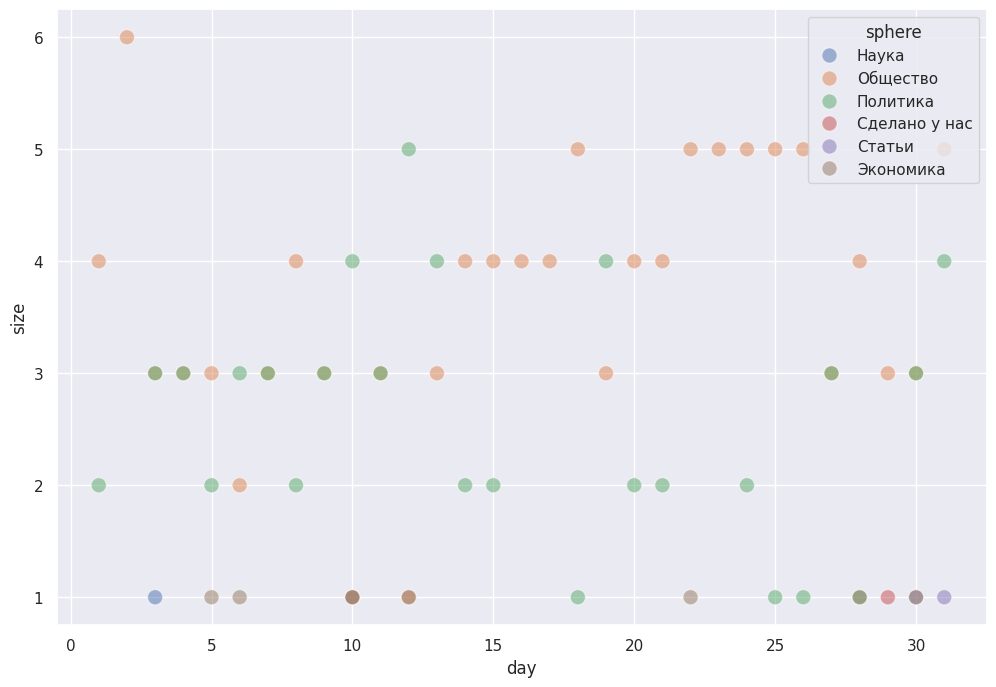

In [71]:
#Сильно больше смысла не стало — но! мы ещё не добавили цвета (hue ниже)
#Заодно увеличим размер (уже делали) и сделаем точки немного прозрачными (alpha)

fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(x='day', y = 'size', hue='sphere', alpha=0.5,
                s=120, data=dec_sizes_sphere, ax=ax)


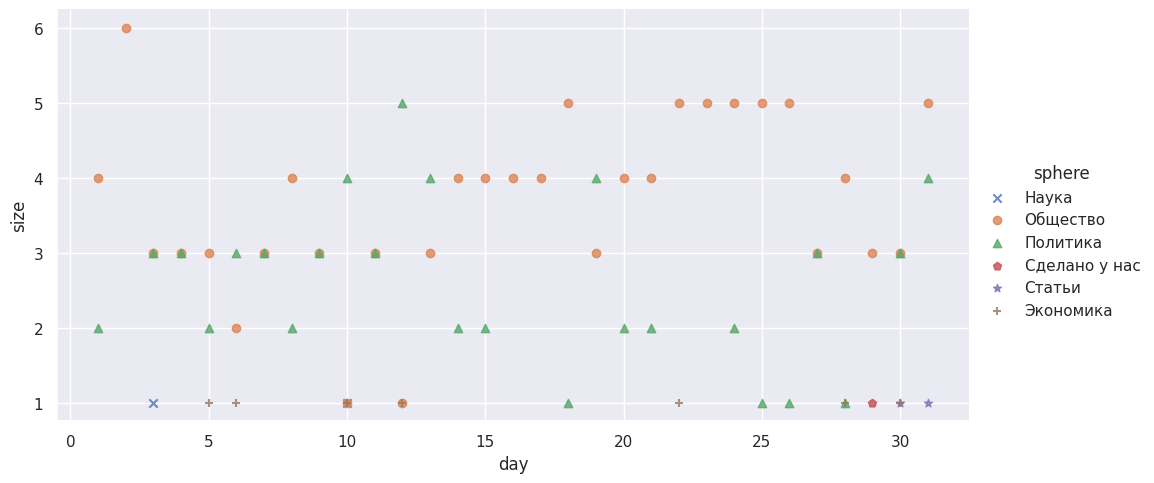

In [72]:
sns.lmplot(x='day', y = 'size', hue='sphere', markers = ['x','o','^','p','*','+'],
          fit_reg=False, height=5, aspect=2, data=dec_sizes_sphere)

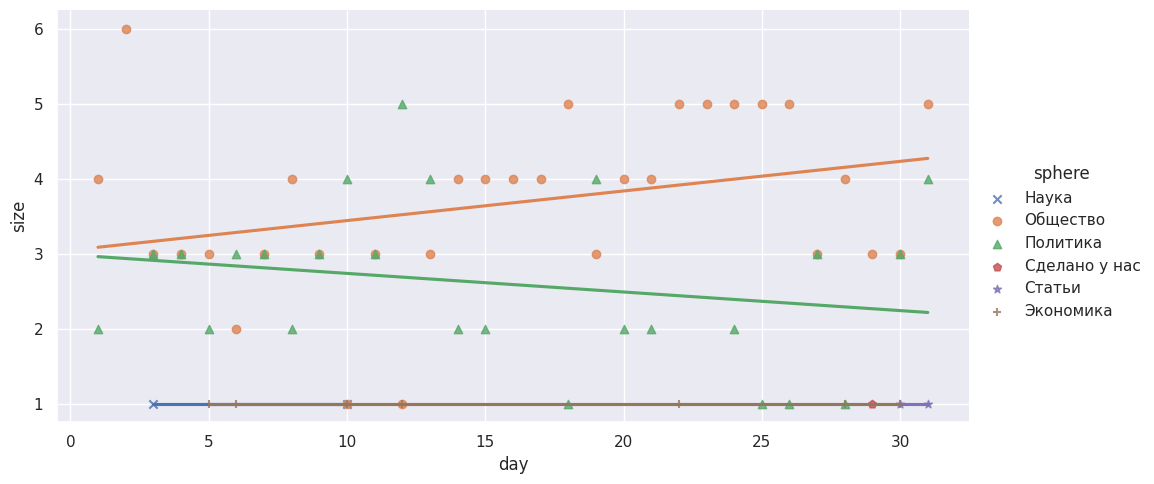

In [73]:
#Можем приблизить прямой

sns.lmplot(x='day', y = 'size', hue='sphere', markers = ['x','o','^','p','*','+'],
           height=5, ci=0, aspect=2, data=dec_sizes_sphere)

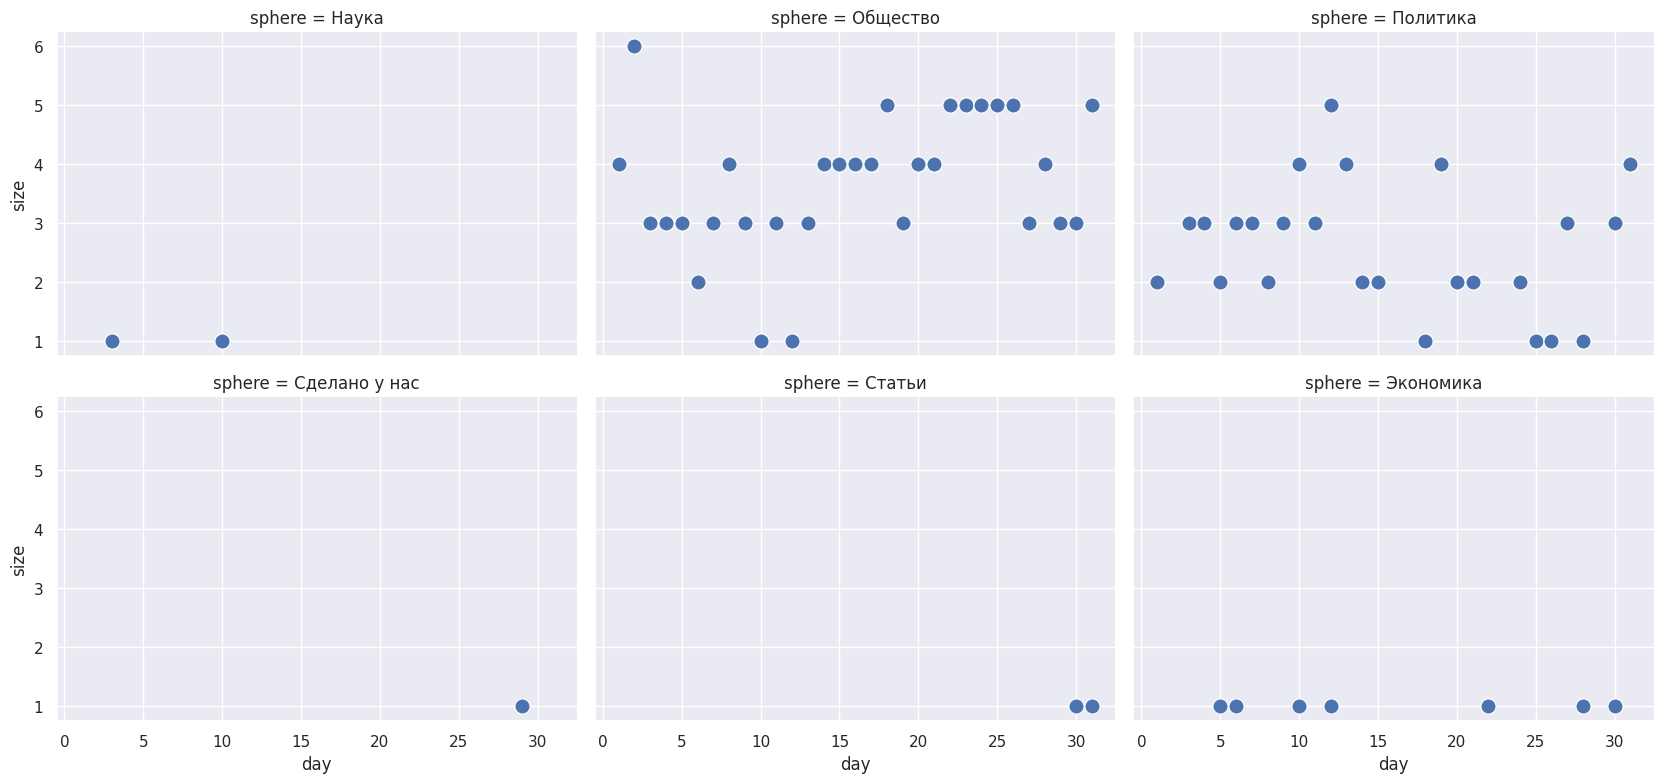

In [74]:
#Кроме того, можем каждую сферу отобразить на отдельном графике

facet_fig = sns.FacetGrid(dec_sizes_sphere, col="sphere", height=4, aspect=1.4, col_wrap=3)
facet_fig.map(sns.scatterplot,'day', 'size', s=120, data=dec_sizes_sphere)

#Итоговые комментарии

У этого семинара будет, может быть, неожиданная мораль. Для других тем, где мы использовали программирование это тоже актуально, но для графиков особенно.

Достаточно сложные структуры мы можем здесь построить буквально в одну строчку кода. Ещё несколько нужны, если вы хотите настроить легенду или изменить размер графика.

Эти строчки кода — и настройки для них — достаточно легко обнаружить простым поиском в интернете. Главное — знать название графика или уметь описать то, что вы в нём хотите поменять (желательно, на английском языке и в Google).

Если вы думаете, что эта тетрадка составлялась каким-то другим образом, вы ошибаетесь:) Её автор в жизни для построения графиков пользуется другим языком программирования (называется R), а конкретные способы построения графиков в Python искал конкретно для этого семинара.